In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier

In [7]:
# Datasetimizi indirelim
data = pd.read_csv("Breast_cancer_data.csv")

In [8]:
# neye benzediğini görmek için ilk beş satıra bakalım, burada diagnosis 0 ve 1 diye hazır numaralandırıldığı için zaten logistic regresyona hazır durumda.
print(data.head())

   mean_radius  mean_texture  mean_perimeter  mean_area  mean_smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   diagnosis  
0          0  
1          0  
2          0  
3          0  
4          0  


In [9]:
data.drop_duplicates(inplace = True)
data

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0
1,20.57,17.77,132.90,1326.0,0.08474,0
2,19.69,21.25,130.00,1203.0,0.10960,0
3,11.42,20.38,77.58,386.1,0.14250,0
4,20.29,14.34,135.10,1297.0,0.10030,0
...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0
565,20.13,28.25,131.20,1261.0,0.09780,0
566,16.60,28.08,108.30,858.1,0.08455,0
567,20.60,29.33,140.10,1265.0,0.11780,0


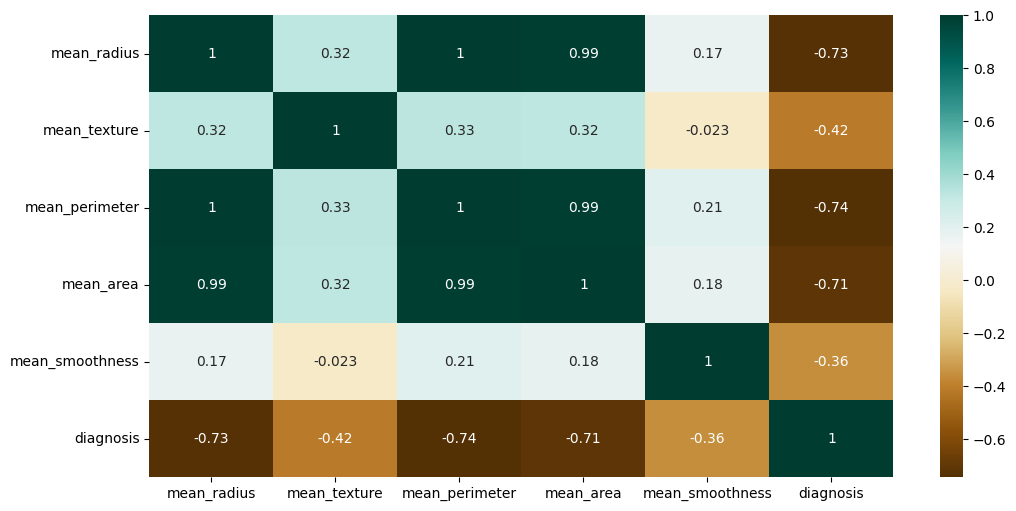

In [10]:
#corelasyonları kontrol edersekm:

plt.figure(figsize = (12,6))
sns.heatmap(data.corr(), annot=True, cmap = 'BrBG')
plt.show()

In [11]:
data1 = data.drop(columns = ['mean_perimeter', 'mean_area'], axis = 1)
data1

,mean_radius,mean_texture,mean_smoothness,diagnosis
0,17.99,10.38,0.11840,0
1,20.57,17.77,0.08474,0
2,19.69,21.25,0.10960,0
3,11.42,20.38,0.14250,0
4,20.29,14.34,0.10030,0
...,...,...,...,...
564,21.56,22.39,0.11100,0
565,20.13,28.25,0.09780,0
566,16.60,28.08,0.08455,0
567,20.60,29.33,0.11780,0


In [13]:
X = data1.iloc[:,:-1].values
y = data1.iloc[:,-1].values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=0)

In [14]:
#feature scaling ile aynı ölçeklemeye sahip verilerle çalıştığımdan emin olmak istiyorum.

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Artificial Neural Network

In [15]:
import tensorflow as tf
import keras
from keras.layers import Dense, Dropout
from keras.models import Sequential

In [16]:
model = Sequential()

In [17]:
model.add(Dense(units = 3, activation = 'relu'))
model.add(Dropout(0.25))
model.add(Dense(units = 3, activation = 'relu'))
model.add(Dropout(0.25))
model.add(Dense(units = 1, activation = 'sigmoid'))

In [18]:
## compile the model
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [19]:
from keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', patience=5, verbose=1)
deep_history = model.fit(X_train, 
                              y_train, 
                              epochs=100,
                              batch_size = 32,
                              validation_data = (X_test, y_test),
                              callbacks=[early_stop]
                            )

Epoch 1/100
15/15 [==============================] - 1s 15ms/step - loss: 0.8271 - accuracy: 0.3560 - val_loss: 0.7939 - val_accuracy: 0.2982
Epoch 2/100
15/15 [==============================] - 0s 4ms/step - loss: 0.8077 - accuracy: 0.3648 - val_loss: 0.7705 - val_accuracy: 0.2982
Epoch 3/100
15/15 [==============================] - 0s 4ms/step - loss: 0.7773 - accuracy: 0.3934 - val_loss: 0.7500 - val_accuracy: 0.3246
Epoch 4/100
15/15 [==============================] - 0s 4ms/step - loss: 0.7538 - accuracy: 0.4308 - val_loss: 0.7332 - val_accuracy: 0.3246
Epoch 5/100
15/15 [==============================] - 0s 4ms/step - loss: 0.7380 - accuracy: 0.4242 - val_loss: 0.7186 - val_accuracy: 0.3509
Epoch 6/100
15/15 [==============================] - 0s 4ms/step - loss: 0.7179 - accuracy: 0.4769 - val_loss: 0.7066 - val_accuracy: 0.4211
Epoch 7/100
15/15 [==============================] - 0s 4ms/step - loss: 0.7101 - accuracy: 0.4879 - val_loss: 0.6962 - val_accuracy: 0.5000
Epoch 8/100


In [20]:
#Accuracy kontrol edelim:

y_pred = model.predict(X_test)

4/4 [==============================] - 0s 2ms/step


In [21]:
y_pred = (y_pred>0.5)

In [22]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
print(accuracy_score(y_test, y_pred))

[[42  5]
 [ 3 64]]
0.9298245614035088
